In [1]:
#-------------------------------------------------------------------------------------JUPYTER NOTEBOOK SETTINGS-------------------------------------------------------------------------------------
from IPython.core.display import display, HTML                                    
display(HTML("<style>.container { width:100% !important; }</style>"))  

/var/folders/ry/454yhlzx6hd15j7rjv4th0lw0000gn/T/ipykernel_31187/2828031236.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
import os
import gc
import re
import librosa
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
from joblib import dump, load

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback, ReduceLROnPlateau, ModelCheckpoint, EarlyStopping 

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
history = load('saved_data/model_training_history.joblib')
model = load_model('saved_data/model_full.keras')
x_test, y_test = load('saved_data/test_data.joblib')
x_test = np.array(x_test, dtype=np.float32)

all_labels = ['battery', 'description', 'environment', 'greeting', 'health', 'noise', 'noise', 'nutrition', 'silence', 'sun', 'water'] 
label_encoder = LabelEncoder()
label_encoder.fit(all_labels)

# Predictions with the model
y_pred = np.argmax(model.predict(x_test), axis=1)

# Decode the integer predictions back to string labels
y_pred_labels = label_encoder.inverse_transform(y_pred)

# Decode y_test if it's not already in integer form
y_test_encoded = label_encoder.transform(y_test)  # Only if y_test is in string format

# Compute confusion matrix with integer labels for calculation
conf_matrix = confusion_matrix(y_test_encoded, y_pred)

# Classification Report with string labels
print("Number of epochs trained:", len(history.history['loss']))
print(classification_report(y_test, y_pred_labels))

2024-05-19 05:34:30.160171: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-05-19 05:34:30.160196: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-05-19 05:34:30.160201: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-05-19 05:34:30.160218: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-05-19 05:34:30.160228: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
/Users/ciprian/Documents/anaconda/anaconda3/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'rmsprop', because i

 15/422 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step    

2024-05-19 05:34:33.971750: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
Number of epochs trained: 245
              precision    recall  f1-score   support

     battery       0.95      0.48      0.64      1350
 description       0.93      0.47      0.63      1350
 environment       0.95      0.47      0.63      1350
    greeting       0.79      0.70      0.74      1350
      health       0.84      0.48      0.61      1350
       noise       0.23      0.86      0.36      1350
   nutrition       0.97      0.48      0.64      1350
     silence       0.39      0.69      0.50      1350
         sun       0.93      0.48      0.63      1350
       water       0.92      0.48      0.63      1350

    accuracy                           0.56     13500
   macro avg       0.79      0.56      0.60     13500
weighted avg       0.79      0.56      0.60     13500



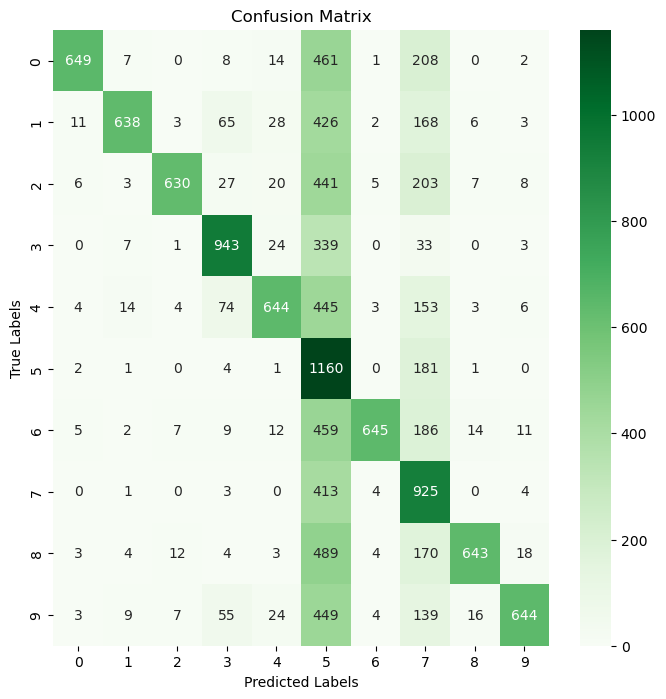

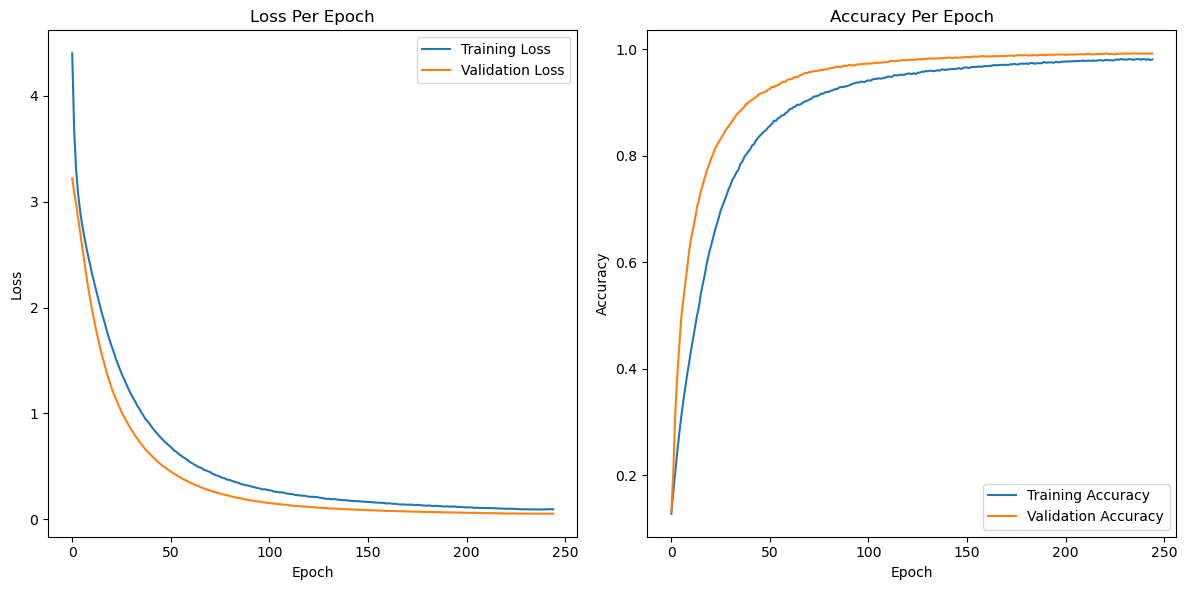

In [6]:
# Plot confusion matrix with string labels for readability
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', ax=ax, 
            xticklabels=(0,1,2,3,4,5,6,7,8,9), 
            yticklabels=(0,1,2,3,4,5,6,7,8,9))
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
plt.show()

# Loss and Accuracy Per Epoch plots
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()